Task 1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from sklearn.preprocessing import LabelEncoder

In [ ]:
customer = pd.read_csv('/content/sample_data/CW customer.csv')

Data points for customers is 2246
Attributes are:
 customer_id             int64
customer_first-name    object
customer_email         object
customer_since         object
loyalty_card_number    object
birthdate              object
gender                  int64
birth_year              int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   customer_first-name  2246 non-null   object
 2   customer_email       2246 non-null   object
 3   customer_since       2246 non-null   object
 4   loyalty_card_number  2246 non-null   object
 5   birthdate            2246 non-null   object
 6   gender               2246 non-null   int64 
 7   birth_year           2246 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.5+ KB
Empty DataFrame
Columns: [customer_id, customer

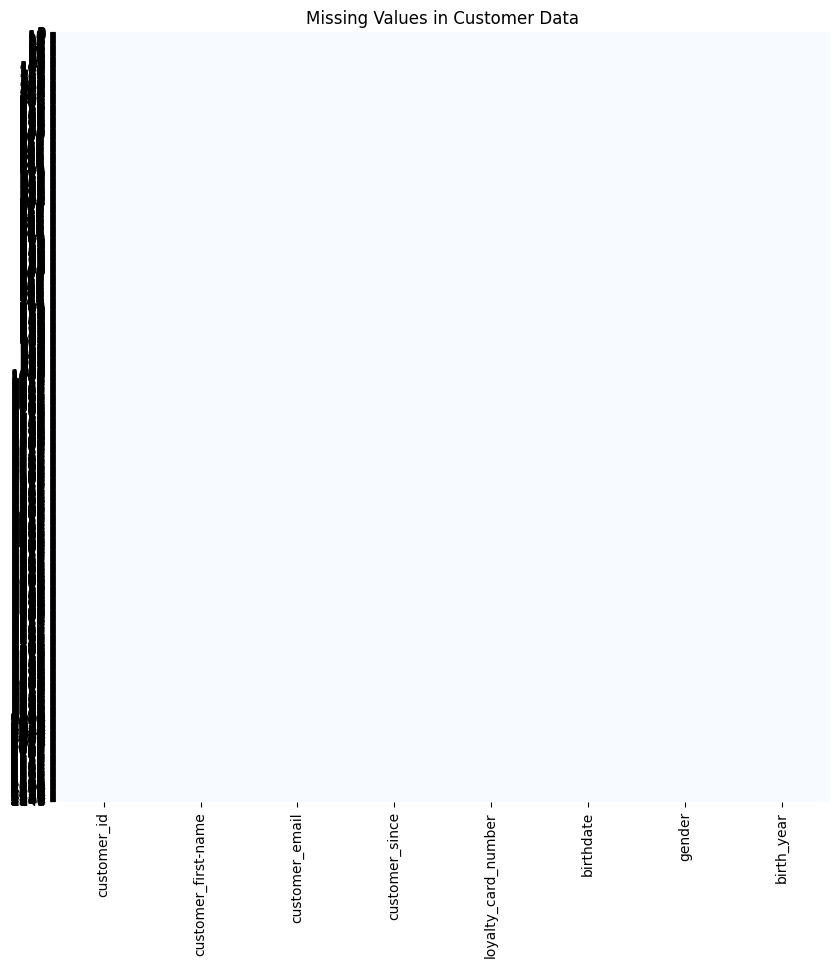

In [25]:
cust_data_points = customer.shape[0]
print("Data points for customers is", cust_data_points)

cust_attr = customer.dtypes
print("Attributes are:\n", cust_attr)

customer.info()

#checking for birth year entry errors only as the other attributes are unlikely to contain an outlier
print(customer[customer['birth_year']> 2014])

#Creating a heatmap to see any missing values
plt.figure(figsize=(10,10))
sns.heatmap(customer.isnull(), cbar=False, cmap = 'Blues', yticklabels = True)
plt.title('Missing Values in Customer Data')
plt.show()

In [ ]:
sales_receipts = pd.read_csv('/content/sample_data/CW sales reciepts.csv')

In [27]:
sales_data_points = sales_receipts.shape[0]
print("Data points for sales is", sales_data_points)

sales_attr = sales_receipts.dtypes
print("Attributes are:\n", sales_attr)

sales_receipts.info()

#Creating a heatmap to see any missing values
plt.figure(figsize=(10,10))
sns.heatmap(sales_receipts.isnull(), cbar=False, cmap = 'Blues', yticklabels = True)
plt.title('Missing Values in Sales Receipts Data')
plt.show()

Data points for sales is 49894
Attributes are:
 transaction_id        int64
transaction_date     object
transaction_time     object
staff_id              int64
customer_id           int64
instore_yn           object
product_id            int64
quantity              int64
price               float64
promo_item_yn        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   transaction_time  49894 non-null  object 
 3   staff_id          49894 non-null  int64  
 4   customer_id       49894 non-null  int64  
 5   instore_yn        49894 non-null  object 
 6   product_id        49894 non-null  int64  
 7   quantity          49894 non-null  int64  
 8   price             49894 non-null  float64
 9   promo_item_yn     49894 non

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7a60f0ba6e60> (for post_execute):


KeyboardInterrupt: 

In [ ]:
coffeeshop_inventory = pd.read_csv('/content/sample_data/Copy of Coffee Shop Sales.csv')

In [ ]:
inv_data_points = coffeeshop_inventory.shape[0]
print("Data points for iventory is", inv_data_points)

inv_attr = coffeeshop_inventory.dtypes
print("Attributes are:\n", inv_attr)

coffeeshop_inventory.info()

Data points for iventory is 149116
Attributes are:
 product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_id        149116 non-null  int64  
 1   unit_price        149116 non-null  float64
 2   product_category  149116 non-null  object 
 3   product_type      149116 non-null  object 
 4   product_detail    149116 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.7+ MB


Task 2 i)

In [ ]:
#Integrating the 3 csv into 1 dataset
#Merging customer & sales receipts first with common attribute, customer ID
merged_file = pd.merge(customer, sales_receipts, on = 'customer_id')

#Merging coffeeshop inventory with common attribute, product ID
final_file = pd.merge(merged_file, coffeeshop_inventory, on = 'product_id')

Task 2 iii) Adding a engineering procedure where I put together all the sales of a customer ID to prevent duplications of customers info every time they make a transaction

In [ ]:
aggregrate_sales = sales_receipts.groupby('customer_id').agg({
    'price': 'sum',
    'transaction_date': 'max',
    'customer_id': 'size'
}).rename(columns={
    'customer_id': 'total_transactions'
}).reset_index()

In [ ]:
#Saving the aggregrate sales to a csv
cleaned_sales = aggregrate_sales.to_csv('aggregrate_sales.csv', index=False)
#Merging final file and aggregrate_sales with common attribute, customer ID.
combined_file = final_file.merge(aggregrate_sales, on = 'customer_id', how = 'left')
final_combined_file = combined_file.to_csv('combined_file.csv', index = False)

In [ ]:
#Encoding customer attribute, gender into numericals
customer['gender'] = LabelEncoder().fit_transform(customer['gender'])

Task 2 ii)
Adding a cleaning procedure by removing repeated rows

In [ ]:
repeated_rows = combined_file.duplicated()
print("Number of repeated rows:", repeated_rows.sum())
combined_file = combined_file.drop_duplicates()


Number of repeated rows: 65186271


Task 2 ii)
Adding a cleaning procedure by removing unwanted column, staff id

In [ ]:
combined_file = combined_file.drop('staff_id', axis = 1)

Task 2 iv)

In [ ]:
# Getting the basic info of all attributes
metadata = combined_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29157 entries, 0 to 65212571
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          29157 non-null  int64  
 1   customer_first-name  29157 non-null  object 
 2   customer_email       29157 non-null  object 
 3   customer_since       29157 non-null  object 
 4   loyalty_card_number  29157 non-null  object 
 5   birthdate            29157 non-null  object 
 6   gender               29157 non-null  object 
 7   birth_year           29157 non-null  int64  
 8   transaction_id       29157 non-null  int64  
 9   transaction_date_x   29157 non-null  object 
 10  transaction_time     29157 non-null  object 
 11  instore_yn           29157 non-null  object 
 12  product_id           29157 non-null  int64  
 13  quantity             29157 non-null  int64  
 14  price_x              29157 non-null  float64
 15  promo_item_yn        29157 non-null  o

In [ ]:
# Creating the metadata and basic stats for each numerical attribute

metadata = []

for col in combined_file.columns:
  col_data = combined_file[col]
  col_metadata = {
      'Column Name': col,
      'Data Type': col_data.dtype,
      'Non-Null Count': col_data.count(),
      'Unique Count': col_data.nunique(),
      'Mean': col_data.mean()if pd.api.types.is_numeric_dtype(col_data) else None,
      'Median': col_data.median()if pd.api.types.is_numeric_dtype(col_data) else None,
      'Standard Deviation': col_data.std() if pd.api.types.is_numeric_dtype(col_data) else None,
      'Min Value': col_data.min() if pd.api.types.is_numeric_dtype(col_data) else None,
      'Max Value': col_data.max() if pd.api.types.is_numeric_dtype(col_data) else None
  }

metadata.append(col_metadata)

#converting dictionary into a df
metadata_df = pd.DataFrame(metadata)
print(metadata_df)

          Column Name Data Type  Non-Null Count  Unique Count       Mean  \
0  total_transactions     int64           29157            30  13.249683   

   Median  Standard Deviation  Min Value  Max Value  
0    13.0            5.121953          1         31  


In [ ]:
# Creating it into a pdf
!pip install reportlab
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet

def metadata_pdf (df, filename = '  /content/sample_data/metadata_report.pdf'):
  doc = SimpleDocTemplate(filename, pagesize = letter)
  styles = getSampleStyleSheet

  title_style = styles['Title']
  body_style = styles['BodyText']

  elements = []
  title = Paragraph('Coffee Shop Metadata', title_style)
  elements.append(title)

  table_data = [df.columns.tolist()] + df.values.tolist()
  table = Table(table_data)

  table.setStyle(TableStyle([
      ('BACKGROUND', (0,0), (-1,0), colors.grey),
      ('TEXTCOLOR', (0,0), (-1,0), colors.whitesmoke),
      ('ALIGN', (0,0), (-1,-1), 'CENTER'),
      ('FONTNAME', (0,0), (-1,0), 'Helvetica-Bold'),
      ('BOTTOMPADDING', (0,0), (-1,0), 12),
      ('BACKGROUND', (0,1), (-1,-1), colors.beige),
      ('GRID', (0,0), (-1,-1), 1, colors.black)
  ]))

  elements.append(table)
  doc.build(elements)
  from google.colab import files
  metadata_pdf(metadata_df)



Task 3: Create the necessary database schema and tables to store the transformed data.

In [ ]:
conn = sqlite3.connect("DEdb")
cur = conn.cursor()

df_combined_file = pd.read_csv('/content/combined_file.csv')

combined_file.to_sql('final_combined_file', conn)

df_combined_file = pd.read_sql_query("SELECT * FROM final_combined_file", conn)
df_combined_file


,index,customer_id,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year,transaction_id,...,quantity,price_x,promo_item_yn,unit_price,product_category,product_type,product_detail,price_y,transaction_date_y,total_transactions
0,0,1,Kelly Key,Venus@adipiscing.edu,4/1/17,908-424-2890,29/5/50,M,1950,1783,...,1,3.0,N,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,29.20,3/4/19,8
1,1,1,Kelly Key,Venus@adipiscing.edu,4/1/17,908-424-2890,29/5/50,M,1950,1783,...,1,3.0,N,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,29.20,3/4/19,8
2,2,1,Kelly Key,Venus@adipiscing.edu,4/1/17,908-424-2890,29/5/50,M,1950,1783,...,1,3.0,N,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,29.20,3/4/19,8
3,3,1,Kelly Key,Venus@adipiscing.edu,4/1/17,908-424-2890,29/5/50,M,1950,1783,...,1,3.0,N,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,29.20,3/4/19,8
4,4,1,Kelly Key,Venus@adipiscing.edu,4/1/17,908-424-2890,29/5/50,M,1950,1783,...,1,3.0,N,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,29.20,3/4/19,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65215423,65215423,8501,Moana,Herrod@ultrices.gov,6/7/18,241-906-4009,27/8/66,F,1966,510,...,1,3.0,N,3.0,Tea,Brewed herbal tea,Peppermint Lg,28.75,4/4/19,6
65215424,65215424,8501,Moana,Herrod@ultrices.gov,6/7/18,241-906-4009,27/8/66,F,1966,510,...,1,3.0,N,3.0,Tea,Brewed herbal tea,Peppermint Lg,28.75,4/4/19,6
65215425,65215425,8501,Moana,Herrod@ultrices.gov,6/7/18,241-906-4009,27/8/66,F,1966,510,...,1,3.0,N,3.0,Tea,Brewed herbal tea,Peppermint Lg,28.75,4/4/19,6
65215426,65215426,8501,Moana,Herrod@ultrices.gov,6/7/18,241-906-4009,27/8/66,F,1966,510,...,1,3.0,N,3.0,Tea,Brewed herbal tea,Peppermint Lg,28.75,4/4/19,6
